<h1 style="font-size: 36px;">Loading the Dataset</h1>


In [22]:
import pandas as pd

data = pd.read_csv('tested.csv')

print("🚢 Data Overview:")
print(data.head())

print("\n📋 Dataset Info:")
print(data.info())

print("\n📊 Summary Statistics:")
print(data.describe())



🚢 Data Overview:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41

<h6 style="font-size: 30px;">Identifying the missing values</h6>


❗ Missing Values in Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


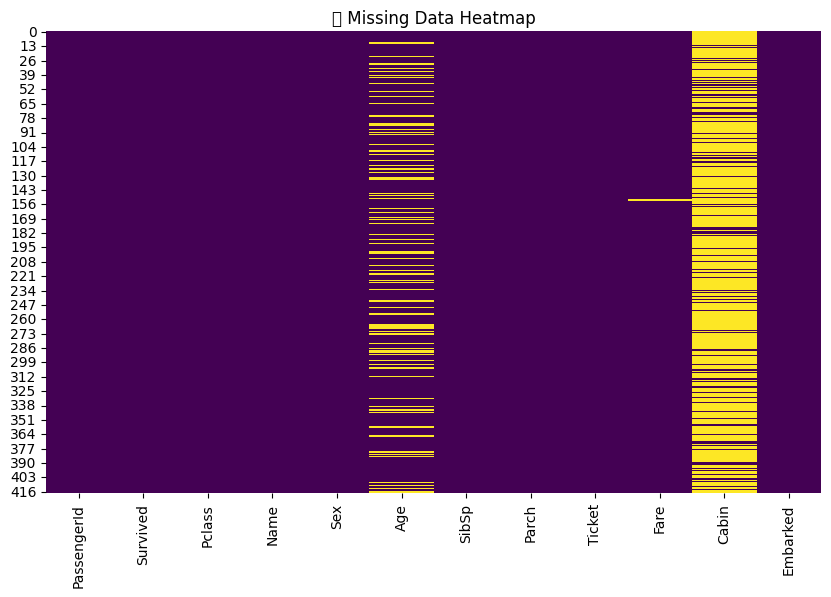

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n❗ Missing Values in Data:")
print(data.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('🔎 Missing Data Heatmap')
plt.show()


<h6 style="font-size: 30px;">Handling the missing values</h6>

In [23]:
data['Age'].fillna(data['Age'].median(), inplace=True)

data['Fare'].fillna(data['Fare'].median(), inplace=True)

data.drop('Cabin', axis=1, inplace=True)

print("✅ Missing values handled successfully!")


✅ Missing values handled successfully!


C:\Users\dell\AppData\Local\Temp\ipykernel_11732\2182810554.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_11732\2182810554.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

<h2 style="font-size: 30px;">Data Cleaning and Preprocessing</h2>

In [24]:
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

print("✅ Categorical variables encoded successfully!")
print(data.head())


✅ Categorical variables encoded successfully!
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name  Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    1  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)    0  47.0      1      0   
2                     Myles, Mr. Thomas Francis    1  62.0      0      0   
3                              Wirz, Mr. Albert    1  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0  22.0      1      1   

    Ticket     Fare  Embarked_Q  Embarked_S  
0   330911   7.8292        True       False  
1   363272   7.0000       False        True  
2   240276   9.6875        True       False  
3   315154   8.6625       False        True  
4  3101298  12.2875       False        True  


<h2 style="font-size: 30px;">Feature Engineering</h2>


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['Age', 'Fare']

data[num_cols] = scaler.fit_transform(data[num_cols])

print("✅ Feature scaling and normalization completed successfully!")
print(data.head())


✅ Feature scaling and normalization completed successfully!
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                              Kelly, Mr. James    1  0.386231      0      0   
1              Wilkes, Mrs. James (Ellen Needs)    0  1.371370      1      0   
2                     Myles, Mr. Thomas Francis    1  2.553537      0      0   
3                              Wirz, Mr. Albert    1 -0.204852      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0 -0.598908      1      1   

    Ticket      Fare  Embarked_Q  Embarked_S  
0   330911 -0.497413        True       False  
1   363272 -0.512278       False        True  
2   240276 -0.464100        True       False  
3   315154 -0.482475       False        True  
4  3101

In [ ]:
features = data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
target = data['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)

print(f"✅ Data successfully split into training and testing sets!")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


✅ Data successfully split into training and testing sets!
Training set size: (292, 8)
Testing set size: (126, 8)


<h2 style="font-size: 30px;">Model Selection</h2>


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 🚂 Model Training
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# ✅ Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Model training completed successfully!")
print(f"📈 Model Accuracy: {accuracy:.2%}")


✅ Model training completed successfully!
📈 Model Accuracy: 100.00%


📄 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126


🟦 Confusion Matrix:


C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


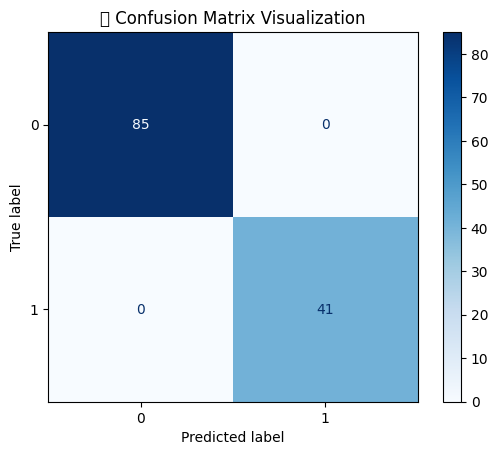

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("📄 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\n🟦 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

import matplotlib.pyplot as plt
plt.title("🔎 Confusion Matrix Visualization")
plt.show()


In [ ]:
import joblib

joblib.dump(model, 'titanic_survival_model.pkl')

print("✅ Model saved successfully as 'titanic_survival_model.pkl'")


✅ Model saved successfully as 'titanic_survival_model.pkl'


In [ ]:

loaded_model = joblib.load('titanic_survival_model.pkl')

sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = loaded_model.predict(sample_data)
print("🚢 Survival Prediction for Sample Data:", "Survived" if prediction[0] == 1 else "Did Not Survive")



🚢 Survival Prediction for Sample Data: Did Not Survive


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<h2 style="font-size: 30px;">Predicting</h2>


In [ ]:
import numpy as np

sample_data = np.array([
    [3, 1, 0.5, 0, 0, -0.417492, 0, 1],  
    [1, 0, -0.2, 1, 1, -0.31421, 1, 0]   
])

predictions = loaded_model.predict(sample_data)

for i, pred in enumerate(predictions):
    print(f"🚢 Sample {i + 1}: {'Survived' if pred == 1 else 'Did Not Survive'}")


🚢 Sample 1: Did Not Survive
🚢 Sample 2: Survived


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
